# Python機械学習クックブック

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## 線形クラス分類器の訓練

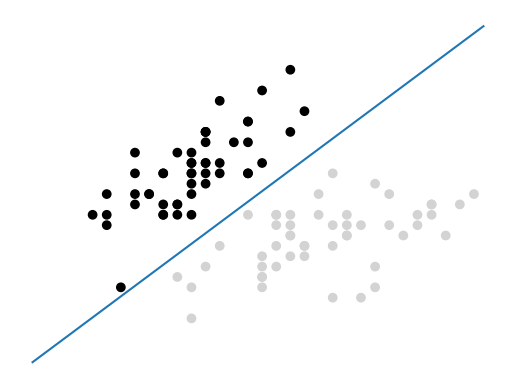

array([0])

In [9]:
iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]

# 特徴量を標準化
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# サポートベクタクラス分類器を作成
svc = LinearSVC(C=1.0)

# サポートベクタクラス分類器を訓練
model = svc.fit(features_standardized, target)

# データポイントをプロットし、色で正解クラスを示す
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c=color)

# サポートベクタを強調するために円をプロット
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# 超平面をプロット
plt.plot(xx, yy)
plt.axis("off"), plt.show()

# 新たな観測値を作成
new_observation = [[-2, 3]]

# 観測値のクラスを予測
svc.predict(new_observation)

## カーネルを用いた線形分離不能なクラスの取り扱い

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


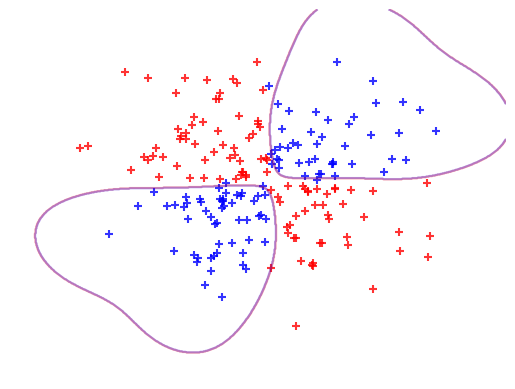

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


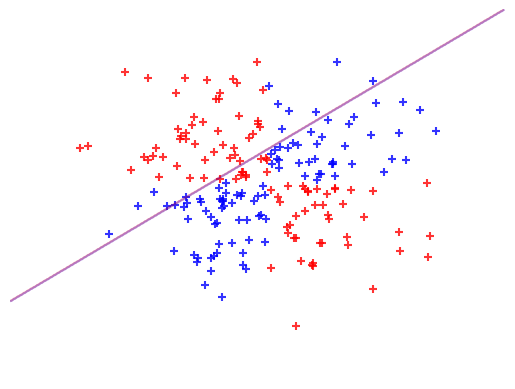

((-3.659172237996741, 3.380827762003109, -3.77259275642665, 3.2474072435732),
 None)

In [13]:
# 乱数シードを設定
np.random.seed(0)

# 2つの特徴量を作成
features = np.random.randn(200, 2)

# XORゲートを用いてターゲットベクトルを作成(線形分離不能なデータ)
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# 放射基底関数(rbf)カーネルを用いたサポートベクタクラス分類器を作成
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# サポートベクタクラス分類器を訓練
model = svc.fit(features, target)

# データポイントをプロットし、色で正解クラスを示す
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(
        np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
        np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01),
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=cmap(idx),
            marker="+",
            label=cl,
        )


# データポイントと決定境界をプロット(カーネル利用)
plot_decision_regions(features, target, classifier=model)
plt.axis("off"), plt.show()


# 線形カーネルを用いたサポートベクタクラス分類器を作成
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# 線形カーネルを用いたサポートベクタクラス分類器を訓練
svc_linear.fit(features, target)

# データポイントと決定境界をプロット(線形分離)
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show()

## 予測確率の生成

In [16]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 特徴量を標準化
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# サポートベクタクラス分類器を作成
svc = SVC(kernel="linear", probability=True, random_state=0)

# サポートベクタクラス分類器を訓練
model = svc.fit(features_standardized, target)

# 新たな観測値を作成
new_observation = [[0.4, 0.4, 0.4, 0.4]]

# クラスの確率を表示
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

## サポートベクタの特定

In [18]:
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]

# 特徴量を標準化
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# サポートベクタクラス分類器を作成
svc = SVC(kernel="linear", random_state=0)

# サポートベクタクラス分類器を訓練
model = svc.fit(features_standardized, target)

# サポートベクタを特定
print(model.support_vectors_)

# サポートベクタのクラスを表示
print(model.support_)

# 各クラスのサポートベクタの数を表示
print(model.n_support_)

[[-0.5810659   0.42196824 -0.80497402 -0.50860702]
 [-1.52079513 -1.67737625 -1.08231219 -0.86427627]
 [-0.89430898 -1.4674418   0.30437864  0.38056609]
 [-0.5810659  -1.25750735  0.09637501  0.55840072]]
[23 41 57 98]
[2 2]


## 不均等なクラスサイズの取り扱い

In [20]:
iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]

# クラス1を除外して不均衡データを作成
features = features[40:, :]
target = target[40:]

# クラスを整数に変換
target = np.where((target == 0), 0, 1)

# 特徴量を標準化
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# サポートベクタクラス分類器を作成
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

# サポートベクタクラス分類器を訓練
model = svc.fit(features_standardized, target)